## Import Library

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.datasets as tfds

import warnings
warnings.filterwarnings('ignore')

#### DNN - Simple Regression
##### membuat data

In [3]:
x = np.array([1,2,3,4,5,6],dtype = float)
y = np.array([2,3,4,8,10,12],dtype= float)

##### visualisasi scatter

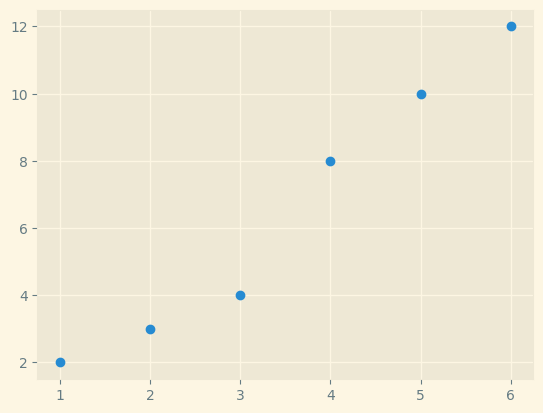

In [5]:
plt.scatter(x, y)
plt.show()

## Membuat Model Sequential

#### Tahap Modeling
1. arsitektur
2. konfigurasi
3. model training

In [7]:
#membuat model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [9]:
#konfigurasi model
model.compile(
    optimizer='adam', 
    loss='mae'
)

In [17]:
#modeling data
model.fit(
    x, y,
    epochs=30, #perulangan model
    steps_per_epoch=20
)

Epoch 1/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7483
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8038
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8321
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8305
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6473
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8853
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7423
Epoch 8/30
20/20 [==============================] - 0s 2ms/step - loss: 0.8623
Epoch 9/30
20/20 [==============================] - 0s 2ms/step - loss: 0.7377
Epoch 10/30
20/20 [==============================] - 0s 1ms/step - loss: 0.7377


#### DNN - MNIST Regression

In [24]:
#load dataset
(x_train, y_train),(x_test, y_test) = tfds.mnist.load_data()

In [25]:
print(y_train[0])
print(x_train.shape)
print(x_test.shape)

5
(60000, 28, 28)
(10000, 28, 28)


In [26]:
num_class = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

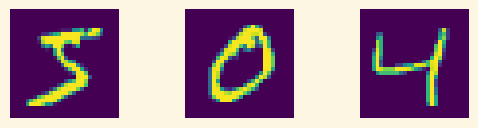

In [27]:
plt.figure()
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

#### Normalisasi

In [121]:
x_train = tf.reshape(x_train,[60000, 784])
x_test = tf.reshape(x_test,[10000, 784])

In [39]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [41]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

#### Membuat Model

In [61]:
#arsitektur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 784),#layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                25120     
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


#### Konfigurasi Model

In [62]:
#konfigurasi
model.compile(
    optimizer = tf.keras.optimizers.Adam(), #adam(learning_rate=1e-4)
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

#### Training Model

In [63]:
# training
history = model.fit(
    x_train, y_train,
    epochs = 30, 
    steps_per_epoch = 25,
    batch_size=128, 
    verbose = 2 ,#tanpa animasi
    validation_data=(x_test, y_test)
)

Epoch 1/30
25/25 - 1s - loss: 2.2999 - accuracy: 0.1912 - val_loss: 2.2958 - val_accuracy: 0.1986 - 1s/epoch - 48ms/step
Epoch 2/30
25/25 - 0s - loss: 2.2901 - accuracy: 0.1919 - val_loss: 2.2811 - val_accuracy: 0.2416 - 302ms/epoch - 12ms/step
Epoch 3/30
25/25 - 0s - loss: 2.2689 - accuracy: 0.2766 - val_loss: 2.2536 - val_accuracy: 0.2544 - 303ms/epoch - 12ms/step
Epoch 4/30
25/25 - 0s - loss: 2.2338 - accuracy: 0.2606 - val_loss: 2.2038 - val_accuracy: 0.2852 - 304ms/epoch - 12ms/step
Epoch 5/30
25/25 - 0s - loss: 2.1764 - accuracy: 0.2809 - val_loss: 2.1319 - val_accuracy: 0.3012 - 310ms/epoch - 12ms/step
Epoch 6/30
25/25 - 0s - loss: 2.0968 - accuracy: 0.2959 - val_loss: 2.0362 - val_accuracy: 0.3185 - 313ms/epoch - 13ms/step
Epoch 7/30
25/25 - 0s - loss: 1.9935 - accuracy: 0.3222 - val_loss: 1.9257 - val_accuracy: 0.3471 - 310ms/epoch - 12ms/step
Epoch 8/30
25/25 - 0s - loss: 1.8741 - accuracy: 0.3650 - val_loss: 1.8117 - val_accuracy: 0.3846 - 316ms/epoch - 13ms/step
Epoch 9/30


#### History Training

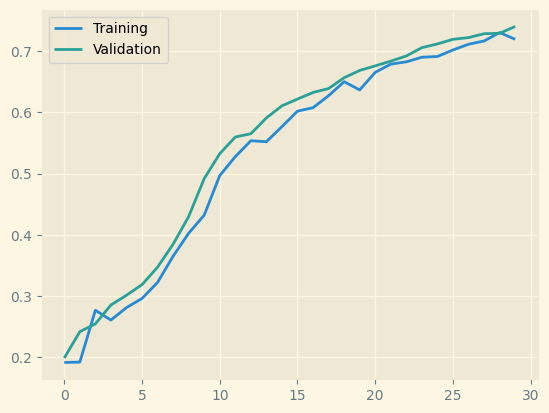

In [64]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

#### Evaluasi Model

In [65]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8496 - accuracy: 0.7406


[0.8496052622795105, 0.7405999898910522]

#### Save Model

In [66]:
model.save('model/model.h5')

In [67]:
model_saved = tf.keras.models.load_model('model/model.h5')
model_saved.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                25120     
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.8496 - accuracy: 0.7406


[0.8496052622795105, 0.7405999898910522]

#### Prediksi Model

In [95]:
hasil = model_saved.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [96]:
hasil

array([[6.1367196e-03, 1.0606468e-02, 5.5509377e-02, ..., 2.5020700e-03,
        2.3264211e-01, 4.2668264e-03],
       [8.5791981e-01, 2.6621683e-07, 9.8136766e-04, ..., 7.6658089e-06,
        1.3690802e-02, 9.2780270e-04],
       [5.2225515e-03, 5.5745374e-03, 9.5282408e-04, ..., 1.4916748e-01,
        1.0728245e-01, 3.5084063e-01],
       ...,
       [1.7692527e-02, 1.7736155e-03, 7.7066373e-04, ..., 1.3121401e-01,
        2.0255302e-01, 2.6182646e-01],
       [2.0280735e-01, 2.2107724e-05, 3.2429576e-02, ..., 1.2297036e-05,
        3.1235207e-02, 1.4755867e-03],
       [4.1694693e-02, 3.5118011e-03, 1.3581441e-02, ..., 1.7199190e-02,
        2.8572276e-01, 1.0285520e-01]], dtype=float32)

In [97]:
x_train.shape

TensorShape([60000, 784])

In [110]:
np.unique(x_train)

array([0.0000000e+00, 1.5378702e-05, 3.0757405e-05, 4.6136101e-05,
       6.1514809e-05, 7.6893506e-05, 9.2272203e-05, 1.0765091e-04,
       1.2302962e-04, 1.3840832e-04, 1.5378701e-04, 1.6916571e-04,
       1.8454441e-04, 1.9992310e-04, 2.1530181e-04, 2.3068051e-04,
       2.4605924e-04, 2.6143793e-04, 2.7681663e-04, 2.9219533e-04,
       3.0757402e-04, 3.2295272e-04, 3.3833142e-04, 3.5371011e-04,
       3.6908881e-04, 3.8446751e-04, 3.9984621e-04, 4.1522493e-04,
       4.3060363e-04, 4.4598232e-04, 4.6136102e-04, 4.7673972e-04,
       4.9211847e-04, 5.0749717e-04, 5.2287587e-04, 5.3825456e-04,
       5.5363326e-04, 5.6901196e-04, 5.8439065e-04, 5.9976935e-04,
       6.1514805e-04, 6.3052675e-04, 6.4590544e-04, 6.6128414e-04,
       6.7666284e-04, 6.9204153e-04, 7.0742023e-04, 7.2279893e-04,
       7.3817762e-04, 7.5355632e-04, 7.6893502e-04, 7.8431371e-04,
       7.9969241e-04, 8.1507111e-04, 8.3044986e-04, 8.4582856e-04,
       8.6120726e-04, 8.7658595e-04, 8.9196465e-04, 9.0734335e

In [111]:
hasil.shape

(60000, 10)

In [112]:
tf.argmax(hasil[22]).numpy()

4

In [113]:
hasil[22]

array([0.0031726 , 0.01448799, 0.00228207, 0.00711556, 0.34794992,
       0.06775513, 0.00784288, 0.11809027, 0.12542833, 0.3058752 ],
      dtype=float32)

TypeError: Invalid shape (784,) for image data

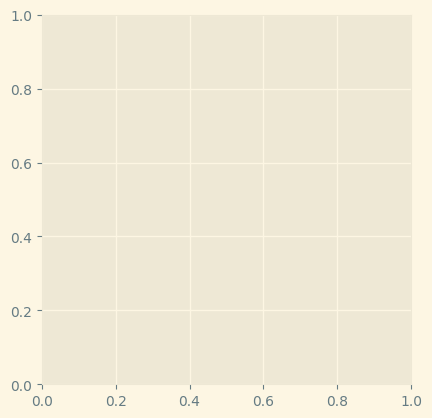

In [126]:
plt.imshow(x_test[i])